# Tarea 5 Modulo 2

Traducción a español y tropicalización: Tobias Alexander Santamaria Diaz

Dataset a utilizar: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

Objetivos del Proyecto: script para automatizar una tarea

Ejecutado el: 2024-11-14 20:57:48

Dataset original cargado correctamente:

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58

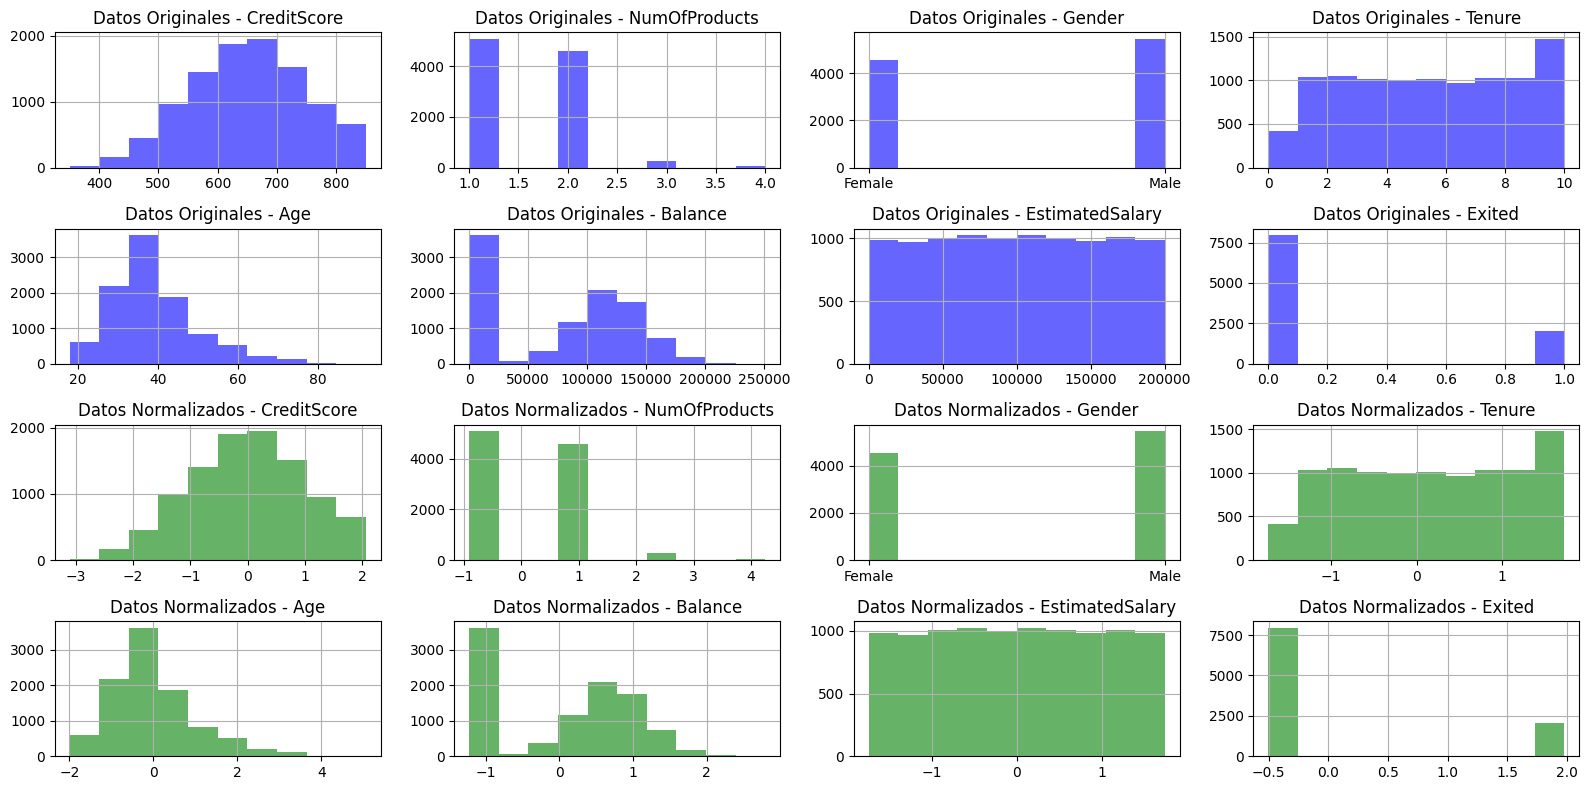

Columna: RowNumber
Valor Mínimo: 1
Valor Máximo: 10000
Rango: 9999
-----------------------------
Columna: CustomerId
Valor Mínimo: 15565701
Valor Máximo: 15815690
Rango: 249989
-----------------------------
Columna: CreditScore
Valor Mínimo: 350
Valor Máximo: 850
Rango: 500
-----------------------------
Columna: Age
Valor Mínimo: 18.0
Valor Máximo: 92.0
Rango: 74.0
-----------------------------
Columna: Tenure
Valor Mínimo: 0
Valor Máximo: 10
Rango: 10
-----------------------------
Columna: Balance
Valor Mínimo: 0.0
Valor Máximo: 250898.09
Rango: 250898.09
-----------------------------
Columna: NumOfProducts
Valor Mínimo: 1
Valor Máximo: 4
Rango: 3
-----------------------------
Columna: HasCrCard
Valor Mínimo: 0.0
Valor Máximo: 1.0
Rango: 1.0
-----------------------------
Columna: IsActiveMember
Valor Mínimo: 0.0
Valor Máximo: 1.0
Rango: 1.0
-----------------------------
Columna: EstimatedSalary
Valor Mínimo: 11.58
Valor Máximo: 199992.48
Rango: 199980.90000000002
---------------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Función para registrar mensajes tanto en consola como en archivo .txt
def log_output(message, logfile="output.txt"):
    # Imprime el mensaje en la consola
    print(message)
    # Guarda el mensaje en el archivo de texto
    with open(logfile, "a") as file:
        file.write(message + "\n")

# Obtener la fecha y hora actual para la ejecución
execution_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
log_output(f"Ejecutado el: {execution_time}\n")

# Paso 1: Cargar el dataset
try:
    df = pd.read_csv("./dataset/Churn_Modelling.csv")
    log_output("Dataset original cargado correctamente:\n")
    log_output(f"{df.head()}\n")  # Muestra las primeras 5 filas del dataset
except Exception as e:
    log_output(f"Error al cargar el dataset: {e}")
    exit()

# Paso 2: Normalización Z-Score
def z_score_normalize_dataframe(df):
    # Normaliza todas las columnas numéricas utilizando el Z-Score
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Verificar si la columna es numérica
            mean = df[column].mean()
            std_dev = df[column].std()
            df[column] = (df[column] - mean) / std_dev  # Aplicar Z-Score
    return df

# Crear una copia del DataFrame original para normalizarlo
df_normalized = df.copy()

# Aplicar la normalización Z-Score
df_normalized = z_score_normalize_dataframe(df_normalized)

# Mostrar los primeros 5 registros del dataset normalizado
log_output("\nDataset normalizado (Z-Score):\n")
log_output(f"{df_normalized.head()}\n")

# Paso 3: Graficar los histogramas de los atributos antes y después de la normalización
log_output("\nGenerando los gráficos de los atributos...")

fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4 filas y 4 columnas de gráficos

# Datos originales
df["CreditScore"].hist(ax=axes[0, 0], color='blue', alpha=0.6)
axes[0, 0].set_title('Datos Originales - CreditScore')

df["NumOfProducts"].hist(ax=axes[0, 1], color='blue', alpha=0.6)
axes[0, 1].set_title('Datos Originales - NumOfProducts')

df["Gender"].hist(ax=axes[0, 2], color='blue', alpha=0.6)
axes[0, 2].set_title('Datos Originales - Gender')

df["Tenure"].hist(ax=axes[0, 3], color='blue', alpha=0.6)
axes[0, 3].set_title('Datos Originales - Tenure')

df["Age"].hist(ax=axes[1, 0], color='blue', alpha=0.6)
axes[1, 0].set_title('Datos Originales - Age')

df["Balance"].hist(ax=axes[1, 1], color='blue', alpha=0.6)
axes[1, 1].set_title('Datos Originales - Balance')

df["EstimatedSalary"].hist(ax=axes[1, 2], color='blue', alpha=0.6)
axes[1, 2].set_title('Datos Originales - EstimatedSalary')

df["Exited"].hist(ax=axes[1, 3], color='blue', alpha=0.6)
axes[1, 3].set_title('Datos Originales - Exited')

# Datos normalizados
df_normalized["CreditScore"].hist(ax=axes[2, 0], color='green', alpha=0.6)
axes[2, 0].set_title('Datos Normalizados - CreditScore')

df_normalized['NumOfProducts'].hist(ax=axes[2, 1], color='green', alpha=0.6)
axes[2, 1].set_title('Datos Normalizados - NumOfProducts')

df_normalized['Gender'].hist(ax=axes[2, 2], color='green', alpha=0.6)
axes[2, 2].set_title('Datos Normalizados - Gender')

df_normalized['Tenure'].hist(ax=axes[2, 3], color='green', alpha=0.6)
axes[2, 3].set_title('Datos Normalizados - Tenure')

df_normalized['Age'].hist(ax=axes[3, 0], color='green', alpha=0.6)
axes[3, 0].set_title('Datos Normalizados - Age')

df_normalized['Balance'].hist(ax=axes[3, 1], color='green', alpha=0.6)
axes[3, 1].set_title('Datos Normalizados - Balance')

df_normalized['EstimatedSalary'].hist(ax=axes[3, 2], color='green', alpha=0.6)
axes[3, 2].set_title('Datos Normalizados - EstimatedSalary')

df_normalized['Exited'].hist(ax=axes[3, 3], color='green', alpha=0.6)
axes[3, 3].set_title('Datos Normalizados - Exited')

# Ajuste del diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

# Paso 4: Normalización Min-Max y análisis
def min_max_normalization(column):
    min_value = column.min()
    max_value = column.max()
    range_value = max_value - min_value
    
    # Imprimir el mínimo, máximo y rango de la columna
    log_output(f"Columna: {column.name}")
    log_output(f"Valor Mínimo: {min_value}")
    log_output(f"Valor Máximo: {max_value}")
    log_output(f"Rango: {range_value}")
    log_output("-----------------------------")
    
    return (column - min_value) / range_value

# Aplicar la normalización Min-Max a todas las columnas numéricas del DataFrame
df_normalized_min_max = df.apply(lambda col: min_max_normalization(col) if np.issubdtype(col.dtype, np.number) else col)

# Mostrar el DataFrame original y el normalizado
log_output("\nDataFrame Normalizado con Min-Max [0, 1]:\n")
log_output(f"{df_normalized_min_max.head()}\n")

# Fin de la ejecución
log_output("\nEjecución completada.\n")

